# SKEW-T Project
Julia Buhrman

In [1]:
import numpy as np
import Bolton
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist import Subplot
from matplotlib.ticker import FuncFormatter, Formatter
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear
from readsoundings import parse_SPC

In [2]:
C_to_K = 273.15
skew_slope = 40
alpha = skew_slope
R_d = 287.04 # J/kgK

In [3]:
def x_from_Tp(T, P):
    '''
    T in K
    p in mb
    '''
    x = T - (alpha * np.log(P))
    return x

def y_from_p(P):
    y = -np.log(P)
    return y

def T_from_xp(x, P):
    T = x + (alpha * np.log(P))
    return T
    
def p_from_y(y):
    P = np.exp(-y)
    return P

In [4]:
def to_thermo(x , y):
    """ Transform (x , y) coordinates to T in degrees Celsius
    and p in mb . """
    P = p_from_y(y)
    T_C = T_from_xp(x, P) - C_to_K
    return T_C, P

def from_thermo(T_C , P):
    """ Transform T_C ( in degrees Celsius )
    and p (in mb) to (x,y). """
    y = y_from_p(P)
    x = x_from_Tp(T_C + C_to_K , P)
    return x, y

In [5]:
p_bottom = 1050.0
p_top = 150
T_minC = -40 #+ C_to_K
T_maxC = 50 #+ C_to_K
p_all = np.arange(p_bottom, p_top-1, -1)

In [6]:
x_min, y_min = from_thermo(T_minC, p_bottom)
x_max, y_max = from_thermo(T_maxC, p_top)

In [7]:
p_levels = np.arange(1000, 150-50, -50) # mb
T_C_levels = np.arange(-80, 50, 10) # Celsius
T_levels = T_C_levels + C_to_K # Kelvin
p_levels = np.arange(1000, 100, -50) # mb
theta_levels_C = np.arange(-40, 110, 10)
theta_levels = theta_levels_C + C_to_K
theta_ep_levels = theta_levels.copy()
mixing_ratios = np.asarray([0.4, 1, 2, 3, 5, 8, 12, 16, 20])/1000 # kg/kg 

In [8]:
theta_levels

array([233.15, 243.15, 253.15, 263.15, 273.15, 283.15, 293.15, 303.15,
       313.15, 323.15, 333.15, 343.15, 353.15, 363.15, 373.15])

In [9]:
mixing_ratios

array([0.0004, 0.001 , 0.002 , 0.003 , 0.005 , 0.008 , 0.012 , 0.016 ,
       0.02  ])

In [10]:
y_p_levels = y_from_p(p_levels)

In [11]:
y_p_levels

array([-6.90775528, -6.85646198, -6.80239476, -6.74523635, -6.68461173,
       -6.62007321, -6.55108034, -6.47697236, -6.39692966, -6.30991828,
       -6.2146081 , -6.10924758, -5.99146455, -5.85793315, -5.70378247,
       -5.52146092, -5.29831737, -5.01063529])

In [12]:
y_all_p = y_from_p(p_all)

In [13]:
x_T_levels = [x_from_Tp(Ti, p_all) for Ti in T_levels]

In [14]:
x_thetas = [x_from_Tp(Bolton.theta_dry(theta_i, p_all), p_all) for theta_i in theta_levels]

In [15]:
x_mixing_ratios = [x_from_Tp(Bolton.mixing_ratio_line(p_all, mixing_ratios_i) + C_to_K, p_all) for mixing_ratios_i in mixing_ratios]

In [16]:
mesh_T, mesh_p = np.meshgrid(np.arange(-60.0, T_levels.max() - C_to_K + 0.1, 0.1), p_all)
theta_ep_mesh = Bolton.theta_ep_field(mesh_T, mesh_p)

[[1.12095414e-02 1.13536197e-02 1.14993901e-02 ... 4.65850445e+01
  4.68542233e+01 4.71248755e+01]
 [1.12202275e-02 1.13644432e-02 1.15103525e-02 ... 4.66327829e+01
  4.69022570e+01 4.71732062e+01]
 [1.12309340e-02 1.13752873e-02 1.15213359e-02 ... 4.66806193e+01
  4.69503892e+01 4.72216361e+01]
 ...
 [7.74425774e-02 7.84380687e-02 7.94452535e-02 ... 5.77202218e+02
  5.83211939e+02 5.89310644e+02]
 [7.79555064e-02 7.89575921e-02 7.99714487e-02 ... 5.84617545e+02
  5.90742506e+02 5.96958963e+02]
 [7.84752754e-02 7.94840433e-02 8.05046607e-02 ... 5.92225881e+02
  5.98470090e+02 6.04808420e+02]]
[[2.10222071e+02 2.10320927e+02 2.10419786e+02 ... 4.12797560e+02
  4.13667407e+02 4.14543508e+02]
 [2.10279264e+02 2.10378148e+02 2.10477034e+02 ... 4.13052458e+02
  4.13923795e+02 4.14801401e+02]
 [2.10336528e+02 2.10435439e+02 2.10534352e+02 ... 4.13307937e+02
  4.14180770e+02 4.15059885e+02]
 ...
 [3.65143676e+02 3.65317747e+02 3.65491850e+02 ... 3.20527438e+05
  3.50496177e+05 3.83951994e+05]

In [17]:
np.shape(theta_ep_mesh)

(901, 1001)

In [18]:
theta_ep_mesh

array([[2.10222071e+02, 2.10320927e+02, 2.10419786e+02, ...,
        4.12797560e+02, 4.13667407e+02, 4.14543508e+02],
       [2.10279264e+02, 2.10378148e+02, 2.10477034e+02, ...,
        4.13052458e+02, 4.13923795e+02, 4.14801401e+02],
       [2.10336528e+02, 2.10435439e+02, 2.10534352e+02, ...,
        4.13307937e+02, 4.14180770e+02, 4.15059885e+02],
       ...,
       [3.65143676e+02, 3.65317747e+02, 3.65491850e+02, ...,
        3.20527438e+05, 3.50496177e+05, 3.83951994e+05],
       [3.65833740e+02, 3.66008159e+02, 3.66182610e+02, ...,
        3.59690785e+05, 3.94240833e+05, 4.32910078e+05],
       [3.66529717e+02, 3.66704486e+02, 3.66879288e+02, ...,
        4.05152018e+05, 4.45151673e+05, 4.90040025e+05]])

In [19]:
def theta_e(T,p):
    '''
    T in C
    p in mb
    '''
    # Allow latent heat to vary with temperature using Kirchoff’s law
    w_s = Bolton.sat_mixing_ratio(p, T)
    RH1 = Bolton.RH(T, p, w_s)
    T_LCL1 = Bolton.T_LCL(T + C_to_K, RH1)
    L_w = (2.501 - (0.00237 * T_LCL1)) * (10**6) # J/kg
    theta1 = Bolton.theta(T_LCL1-C_to_K, p)
    a = (1.0723 * (10**-6) * (L_w/T_LCL1)) * (w_s * (1 + (0.810 * (10 **-3) * w_s)))
    theta_e = theta1 * np.exp(a)
    return theta_e

In [20]:
theta_e_mesh = theta_e(mesh_T, mesh_p)

In [21]:
np.shape(theta_e_mesh)

(901, 1001)

In [22]:
skew_grid_helper = GridHelperCurveLinear((from_thermo, to_thermo))

In [23]:
sounding_data = parse_SPC('/Users/juliabman/Desktop/research2024/hw/cloudphysics/MAF_20241116.txt')

In [24]:
snd_T = sounding_data['T']
# all temperature values , deg . C , should be in this range .
good_T = (snd_T > -100.0) & (snd_T < 60.0)

snd_p = sounding_data['p']
good_p = (snd_p > p_top) & (snd_p < 900)

snd_Td = sounding_data['Td']
good_Td = (snd_Td > -100.0) & (snd_Td < 60.0)

In [25]:
x_snd_T = x_from_Tp(snd_T[good_p] + C_to_K, snd_p[good_p])
x_snd_Td = x_from_Tp(snd_Td[good_p] + C_to_K, snd_p[good_p])
y_snd_p = y_from_p(snd_p[good_p])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


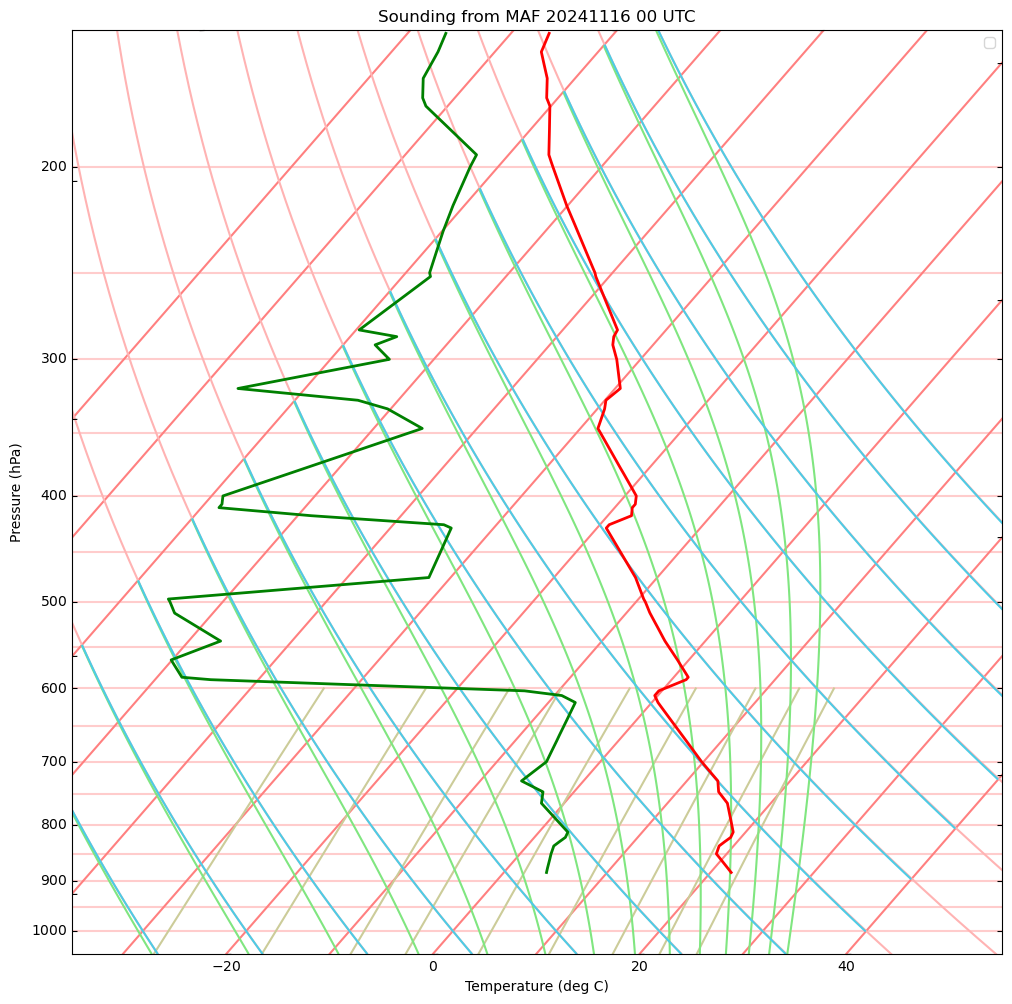

In [32]:
fig = plt.figure(figsize= (12,12))
ax = Subplot(fig, 1, 1, 1, grid_helper = skew_grid_helper)

def format_coord(x, y):
    T, p = to_thermo(x, y)
    return "{0:5.1f} C, {1:5.1f} mb".format(float(T), float(p))

ax.format_coord = format_coord
ax.set_xlabel('Temperature (deg C)')
ax.set_ylabel('Pressure (hPa)')
fig.add_subplot(ax)

for yi in y_p_levels:
    ax.plot((x_min, x_max), (yi, yi), color = (1.0, 0.8, 0.8))
    
for x_T in x_T_levels:
    ax.plot(x_T, y_all_p, color = (1.0, 0.5, 0.5))
    
for x_theta in x_thetas:
    ax.plot(x_theta, y_all_p, color =(1.0, 0.7, 0.7))

for x_mixing_ratio in x_mixing_ratios:
    good = p_all >= 600 # restrict mixing ratio lines to below 600 mb
    ax.plot(x_mixing_ratio[good], y_all_p[good], color = (0.8, 0.8, 0.6))
    
n_moist = len(theta_ep_levels)
moist_colors = ((0.5 ,0.9 ,0.5),) * n_moist
ax.contour(x_from_Tp(mesh_T + C_to_K, mesh_p), y_from_p(mesh_p), theta_ep_mesh, theta_ep_levels, colors = moist_colors)


n_e = len(theta_ep_levels)
e_colors = ((0.3, 0.8, 0.9),) * n_e
ax.contour(x_from_Tp(mesh_T + C_to_K, mesh_p), y_from_p(mesh_p), theta_e_mesh, theta_levels, colors = e_colors)
    
ax.plot(x_snd_Td, y_snd_p, linewidth =2, color = 'g')
ax.plot(x_snd_T, y_snd_p, linewidth =2, color = 'r')
ax.axis((x_min, x_max, y_min, y_max))
plt.xlim(-40,50)
ax.set_title(('Sounding from MAF 20241116 00 UTC'))
ax.legend()
plt.show()